In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#setting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configure plot aesthetics
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

In [23]:
data = pd.read_csv("/kaggle/input/spotify-global-music-dataset-20092025/spotify_data clean.csv")

data.head(5)

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [24]:
df = pd.DataFrame(data)

print(df.shape)
print(df.dtypes)


(8582, 15)
track_id               object
track_name             object
track_number            int64
track_popularity        int64
explicit                 bool
artist_name            object
artist_popularity       int64
artist_followers        int64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
track_duration_min    float64
dtype: object


In [25]:
df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,6.052792,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000


In [26]:
df.isnull().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [27]:
#clean artist_name

clean = ["(((()))))","-"]
df = df[~df["artist_name"].isin(clean)]  #เลือกแถวไม่อยู่ใน clean

df = df.dropna(subset=["artist_name"])

print(df.shape)

(8578, 15)


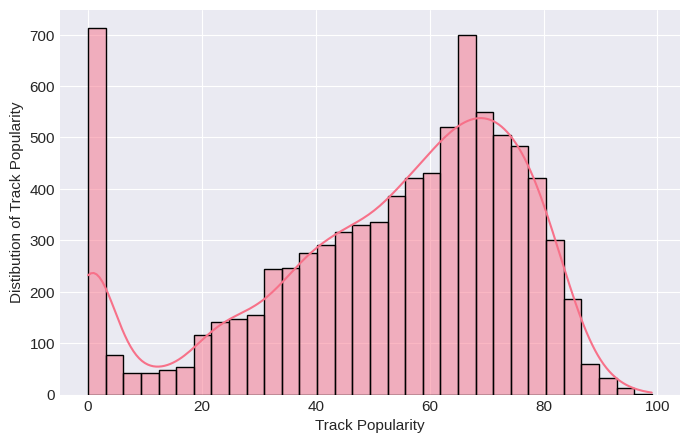

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df['track_popularity'],kde = True)
plt.xlabel("Track Popularity")
plt.ylabel("Distibution of Track Popularity")
plt.show()

#df["track_popularity"].value_counts()
#น่าใช้ median

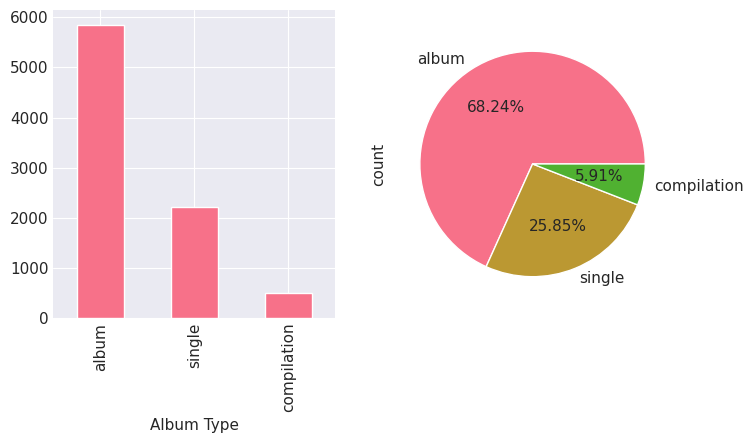

album_type
album          5854
single         2217
compilation     507
Name: count, dtype: int64

In [116]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df["album_type"].value_counts().plot(kind="bar")
plt.xlabel("Album Type")
plt.subplot(1,2,2)
df["album_type"].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.show()

df["album_type"].value_counts()
# df["album_type"].value_counts(normalize=True)*100 ทำ %

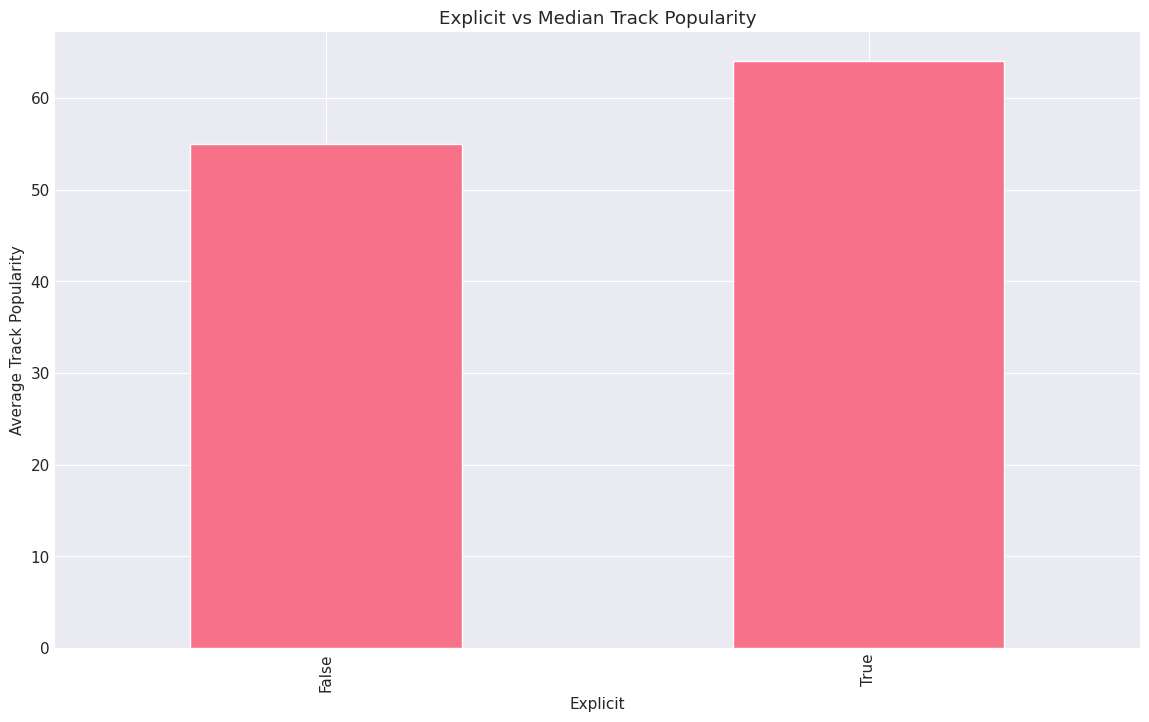

In [111]:
exp_pop_mean = df.groupby("explicit")["track_popularity"].median()
exp_pop_mean.plot(kind="bar")
plt.xlabel("Explicit")
plt.ylabel("Average Track Popularity")
plt.title("Explicit vs Median Track Popularity")
plt.show()

In [68]:
top_artist_name = df.groupby('artist_name')["artist_popularity"].max().nlargest(10).reset_index()
top_artist_name.columns = ['artist_name','artist_popularity']

#top_artist_name

top_artist_track = df.groupby('artist_name')["track_popularity"].median().nlargest(10).reset_index()
top_artist_track.columns = ['artist_name','track_popularity']

#top_artist_track

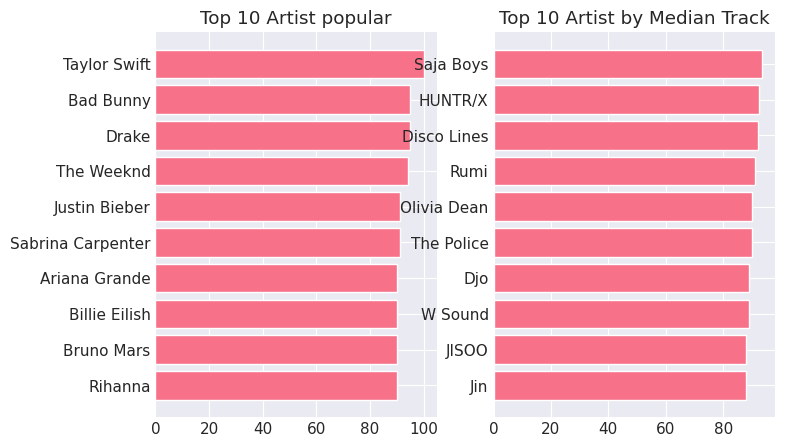

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,5))

ax1.barh(top_artist_name['artist_name'],top_artist_name['artist_popularity'])
ax1.set_title('Top 10 Artist popular')
ax1.invert_yaxis() # มากไปน้อย


ax2.barh(top_artist_track['artist_name'],
         top_artist_track['track_popularity'],)
ax2.set_title("Top 10 Artist by Median Track")
ax2.invert_yaxis()


plt.show()

#print("Top artist name counts:")
#print(top_artist_name.value_counts())

#print("\nTop artist track counts:")
#print(top_artist_track.value_counts())


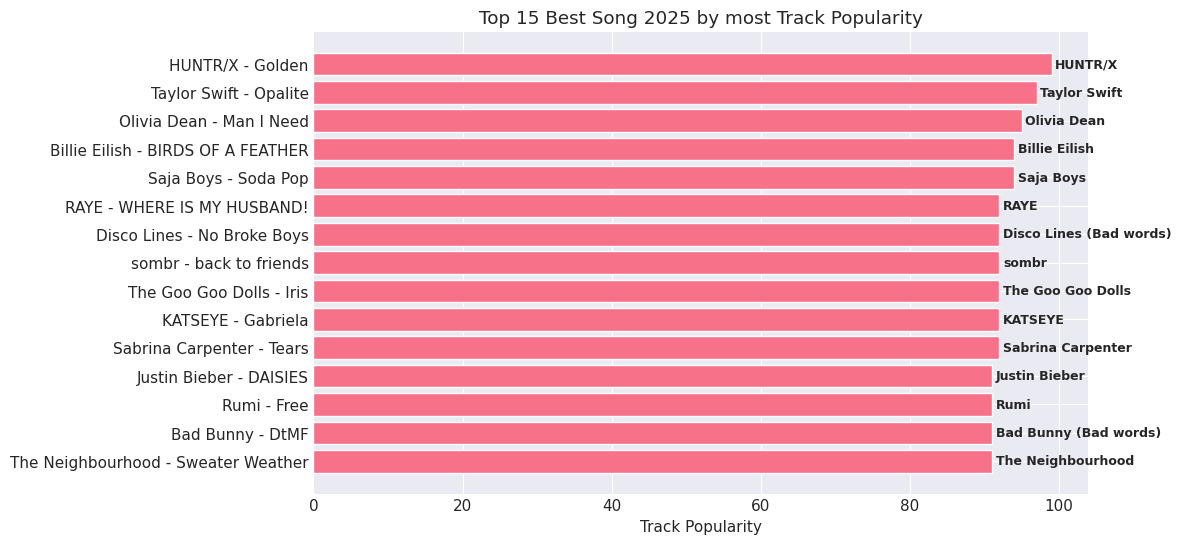

          artist_name            track_name  track_popularity  \
0             HUNTR/X                Golden                99   
1        Taylor Swift               Opalite                97   
2         Olivia Dean            Man I Need                95   
3       Billie Eilish    BIRDS OF A FEATHER                94   
4           Saja Boys              Soda Pop                94   
5                RAYE  WHERE IS MY HUSBAND!                92   
6         Disco Lines         No Broke Boys                92   
7               sombr       back to friends                92   
8   The Goo Goo Dolls                  Iris                92   
9             KATSEYE              Gabriela                92   
10  Sabrina Carpenter                 Tears                92   
11      Justin Bieber               DAISIES                91   
12               Rumi                  Free                91   
13          Bad Bunny                  DtMF                91   
14  The Neighbourhood    

In [121]:
top_track_per_artist = (
    df[['artist_name', 'track_name', 'track_popularity', 'artist_followers','explicit']]
      .sort_values("track_popularity", ascending=False)
      .drop_duplicates("artist_name")
      .reset_index(drop=True)
)


top15 = top_track_per_artist.head(15)

plt.figure(figsize=(10, 6))
labels = top15['artist_name'] + " - " + top15['track_name']

plt.barh(labels, top15['track_popularity'])

for i, (pop, artist, explicit) in enumerate(
    zip(
        top15['track_popularity'],
        top15['artist_name'],
        top15['explicit']
    )
):
    tag = " (Bad words)" if explicit else ""
    plt.text(
        pop + 0.5,
        i,
        f"{artist}{tag}",
        va='center',
        fontsize=9,
        fontweight='bold'
    )

plt.xlabel("Track Popularity")
plt.title("Top 15 Best Song 2025 by most Track Popularity")
plt.gca().invert_yaxis()  # ให้ดังสุดอยู่บน
plt.show()

print(top_track_per_artist.head(15))


In [122]:
top_artists = df[['artist_name', 'artist_followers']] \
                \
                .sort_values(by='artist_followers', ascending=False).drop_duplicates("artist_name").reset_index(drop=True) \
                .head(10)

top_artists

,artist_name,artist_followers
0,Taylor Swift,145542136
1,Ed Sheeran,122802777
2,Billie Eilish,118797451
3,The Weeknd,113039308
4,Ariana Grande,107418606
5,Eminem,104584370
6,Drake,103126025
7,Bad Bunny,102610644
8,Justin Bieber,85050158
9,BTS,81197976


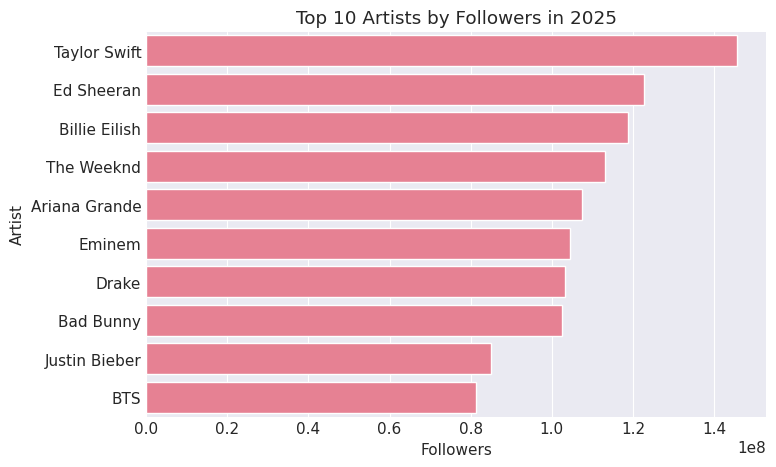

In [124]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='artist_followers',
    y='artist_name',
    data=top_artists
)
plt.title("Top 10 Artists by Followers in 2025")
plt.xlabel("Followers")
plt.ylabel("Artist")
plt.show()